#### Предсказываем цену автомобиля

В папке лежит датасет Car details v3, в котором содержатся сведения об автомобилях, их характеристики и цены. Обучите модель линейной регрессии, которая будет предсказывать цену автомобиля по его характеристикам. 

Придется хорошенько поработать с характеристиками: это *творческая* часть задания. Во-первых, надо привести их в машиночитаемый вид, а во-вторых, можно посмотреть, как они коррелируют друг с другом и не нужно ли кого-то из них дропнуть или наоборот. 

*Примечание*: без работы над фичами за все дз - **0 баллов**. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pylab as plt

In [185]:
cardata = pd.read_csv('Car details v3.csv')
cardata.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [186]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [187]:
print(set(cardata.seller_type)) # посмотрела, какие варианты в этих колонках
print(set(cardata.transmission))
print(set(cardata.owner))

{'Dealer', 'Individual', 'Trustmark Dealer'}
{'Automatic', 'Manual'}
{'Third Owner', 'First Owner', 'Second Owner', 'Test Drive Car', 'Fourth & Above Owner'}


In [188]:
cardata.drop(['torque'], axis= 1, inplace= True) 

In [189]:
cardata = pd.get_dummies(cardata, columns=['owner'], drop_first=True)

In [190]:
#mileage engine	max_power
# разделяю значения ячеек на 2 разные колонки
cardata[['mileage', 'km']] = cardata['mileage'].str.split(' ', expand=True)
cardata[['engine', 'cc']] = cardata['engine'].str.split(' ', expand=True)
cardata[['max_power', 'bhp']] = cardata['max_power'].str.split(' ', expand=True)


In [191]:
cardata['brand']= cardata['name'].apply(lambda x : str(x).split(' ')[0]) # создаю новый столбец с брендом

In [192]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        8128 non-null   object 
 1   year                        8128 non-null   int64  
 2   selling_price               8128 non-null   int64  
 3   km_driven                   8128 non-null   int64  
 4   fuel                        8128 non-null   object 
 5   seller_type                 8128 non-null   object 
 6   transmission                8128 non-null   object 
 7   mileage                     7907 non-null   object 
 8   engine                      7907 non-null   object 
 9   max_power                   7913 non-null   object 
 10  seats                       7907 non-null   float64
 11  owner_Fourth & Above Owner  8128 non-null   bool   
 12  owner_Second Owner          8128 non-null   bool   
 13  owner_Test Drive Car        8128 

In [193]:
cardata.drop(['bhp', 'cc', 'km', 'name'], axis= 1, inplace= True) # убираю ненужные колонки

In [194]:
cardata['max_power'] = pd.to_numeric(cardata['max_power']) # перевожу значения из object в числа
cardata['engine'] = pd.to_numeric(cardata['engine'])
cardata['mileage'] = pd.to_numeric(cardata['mileage'])

In [195]:
categ_columns = cardata.select_dtypes(['object']).columns  # перевожу оставшиеся значения в цифры
cardata[categ_columns] = cardata[categ_columns].apply (lambda x: pd.factorize(x)[0])

In [196]:
cardata.head(10) # теперь все данные числовые

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand
0,2014,450000,145500,0,0,0,23.40,1248.0,74.00,5.0,False,False,False,False,0
1,2014,370000,120000,0,0,0,21.14,1498.0,103.52,5.0,False,True,False,False,1
2,2006,158000,140000,1,0,0,17.70,1497.0,78.00,5.0,False,False,False,True,2
3,2010,225000,127000,0,0,0,23.00,1396.0,90.00,5.0,False,False,False,False,3
4,2007,130000,120000,1,0,0,16.10,1298.0,88.20,5.0,False,False,False,False,0
5,2017,440000,45000,1,0,0,20.14,1197.0,81.86,5.0,False,False,False,False,3
6,2007,96000,175000,2,0,0,17.30,1061.0,57.50,5.0,False,False,False,False,0
7,2001,45000,5000,1,0,0,16.10,796.0,37.00,4.0,False,True,False,False,0
8,2011,350000,90000,0,0,0,23.59,1364.0,67.10,5.0,False,False,False,False,4
9,2013,200000,169000,0,0,0,20.00,1399.0,68.10,5.0,False,False,False,False,5


year


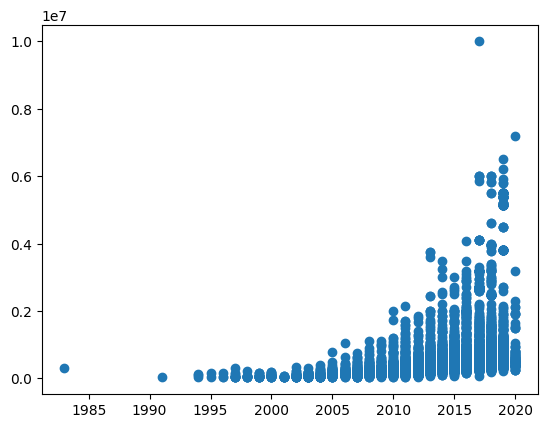

km_driven


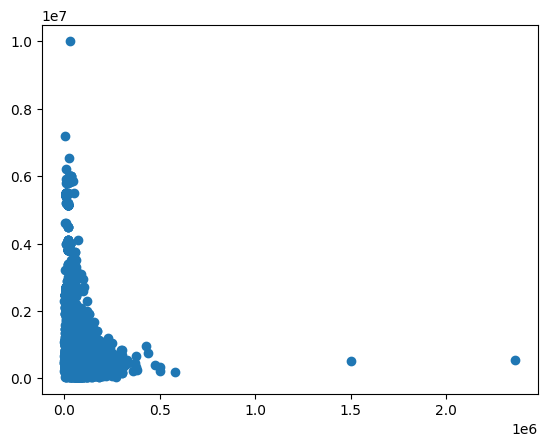

fuel


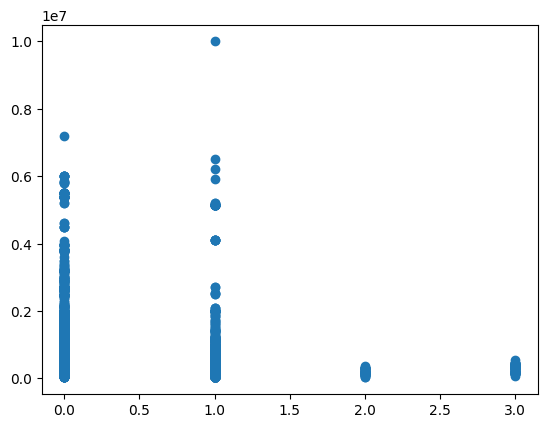

seller_type


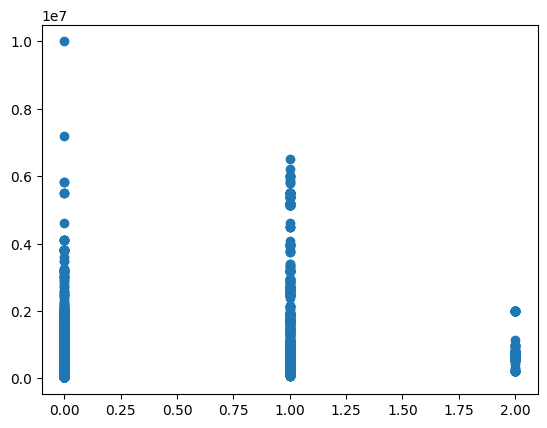

transmission


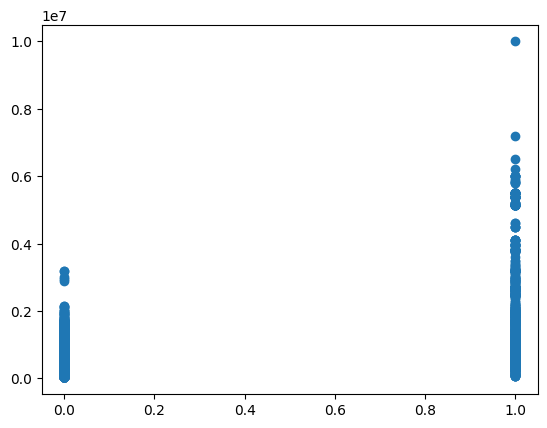

mileage


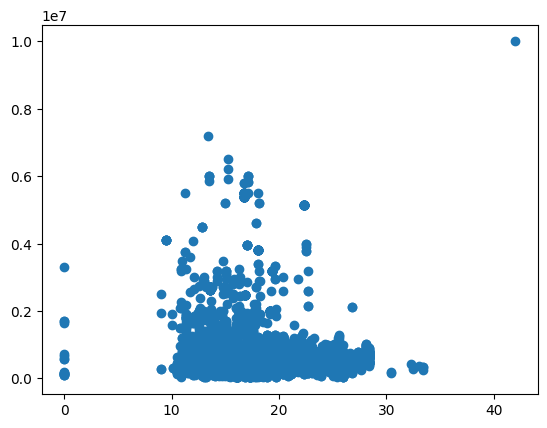

engine


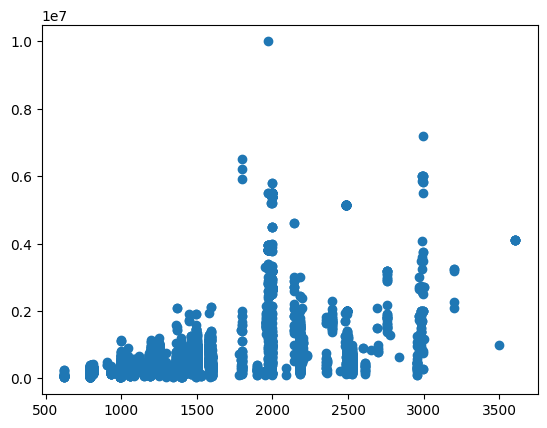

max_power


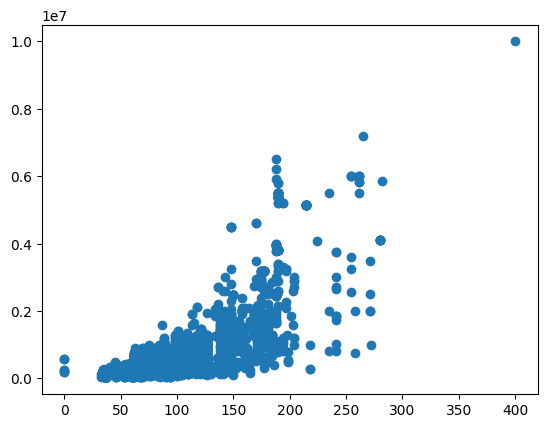

seats


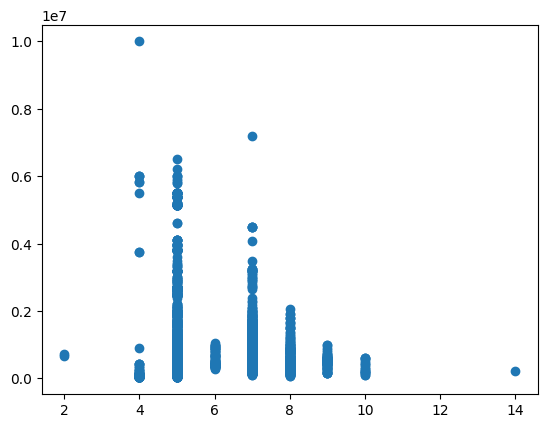

owner_Fourth & Above Owner


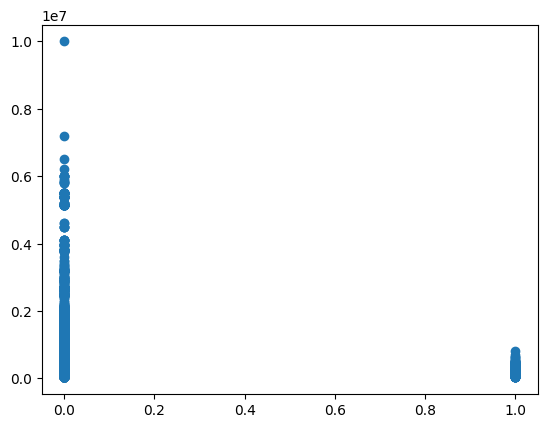

owner_Second Owner


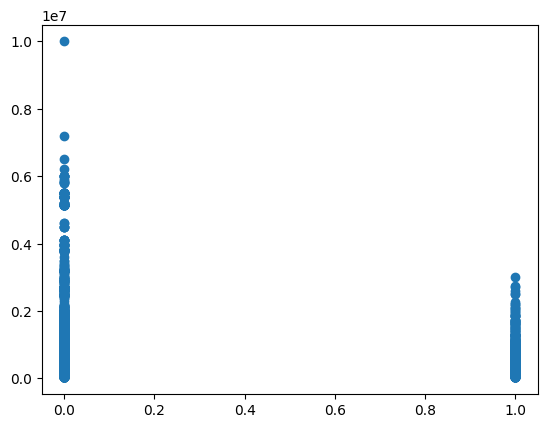

owner_Test Drive Car


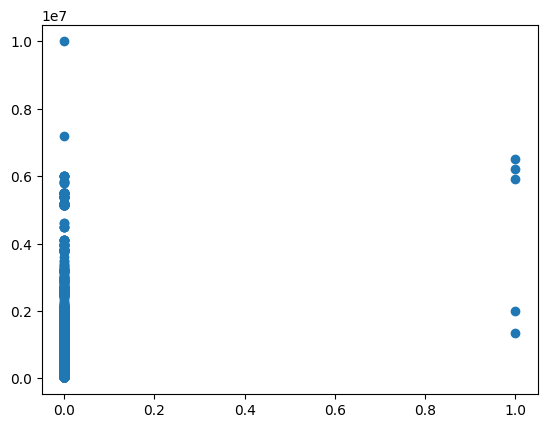

owner_Third Owner


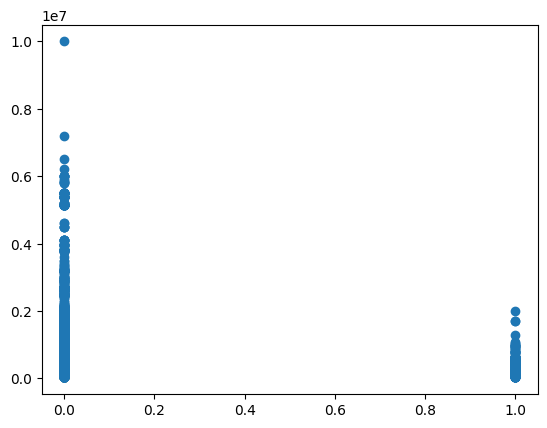

brand


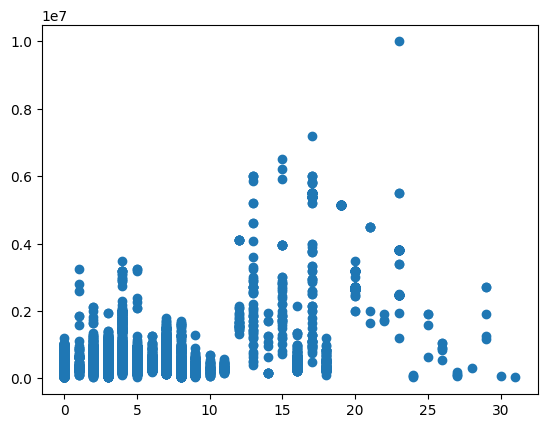

In [197]:
for c in cardata.columns:
    if c != 'selling_price':
        print(c)
        plt.scatter(cardata[c], cardata['selling_price'])
        plt.show()

In [198]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        8128 non-null   int64  
 1   selling_price               8128 non-null   int64  
 2   km_driven                   8128 non-null   int64  
 3   fuel                        8128 non-null   int64  
 4   seller_type                 8128 non-null   int64  
 5   transmission                8128 non-null   int64  
 6   mileage                     7907 non-null   float64
 7   engine                      7907 non-null   float64
 8   max_power                   7912 non-null   float64
 9   seats                       7907 non-null   float64
 10  owner_Fourth & Above Owner  8128 non-null   bool   
 11  owner_Second Owner          8128 non-null   bool   
 12  owner_Test Drive Car        8128 non-null   bool   
 13  owner_Third Owner           8128 

In [199]:
cardata['engine'] = cardata['engine'].fillna(cardata['engine'].mean()) # решила заменить NaN на средние значения
cardata['max_power'] = cardata['max_power'].fillna(cardata['max_power'].mean())
cardata['seats'] = cardata['seats'].fillna(cardata['seats'].mean())

In [200]:
cardata = cardata.fillna(0) # чтобы заполнить пробег, т. к. скорее всего без пробега (машины, где не указано)

In [201]:
cardata.corr().round(3).style.background_gradient(cmap='coolwarm')

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand
year,1.000000,0.414000,-0.418000,-0.051000,0.235000,0.245000,0.407000,0.018000,0.213000,-0.009000,-0.207000,-0.311000,0.032000,-0.280000,0.115000
selling_price,0.414000,1.000000,-0.226000,-0.203000,0.323000,0.589000,-0.045000,0.454000,0.745000,0.041000,-0.076000,-0.180000,0.116000,-0.119000,0.502000
km_driven,-0.418000,-0.226000,1.000000,-0.240000,-0.195000,-0.201000,-0.176000,0.204000,-0.038000,0.225000,0.095000,0.210000,-0.024000,0.146000,-0.031000
fuel,-0.051000,-0.203000,-0.240000,1.000000,0.032000,0.010000,-0.042000,-0.479000,-0.299000,-0.331000,0.014000,-0.037000,0.015000,0.014000,-0.293000
seller_type,0.235000,0.323000,-0.195000,0.032000,1.000000,0.356000,0.007000,0.119000,0.237000,-0.075000,-0.063000,-0.150000,0.043000,-0.110000,0.096000
transmission,0.245000,0.589000,-0.201000,0.010000,0.356000,1.000000,-0.112000,0.282000,0.538000,-0.072000,-0.042000,-0.120000,0.050000,-0.072000,0.338000
mileage,0.407000,-0.045000,-0.176000,-0.042000,0.007000,-0.112000,1.000000,-0.451000,-0.285000,-0.354000,-0.084000,-0.112000,-0.010000,-0.129000,-0.192000
engine,0.018000,0.454000,0.204000,-0.479000,0.119000,0.282000,-0.451000,1.000000,0.702000,0.610000,-0.006000,0.020000,0.014000,-0.005000,0.431000
max_power,0.213000,0.745000,-0.038000,-0.299000,0.237000,0.538000,-0.285000,0.702000,1.000000,0.191000,-0.035000,-0.082000,0.050000,-0.051000,0.507000
seats,-0.009000,0.041000,0.225000,-0.331000,-0.075000,-0.072000,-0.354000,0.610000,0.191000,1.000000,0.007000,0.034000,-0.011000,0.005000,0.108000


In [202]:
cardata.drop(['owner_Fourth & Above Owner', 'seats', 'mileage', 'owner_Test Drive Car', 'owner_Third Owner', 'owner_Second Owner'], axis= 1, inplace= True) 

In [206]:
X_full = cardata.drop('selling_price', axis=1) 
y_full = cardata['selling_price'] 

Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2)
model = LinearRegression()
model.fit(Xtrain, ytrain) 
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5) # всё равно большая ошибка, но это был лучший результат

436071.6178362709 459033.3696202641
